In [44]:
# profile = ProfileReport(df)
# profile

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
from functions import *
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA


2024-08-02 03:25:33.662392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
df = pd.read_csv('../data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

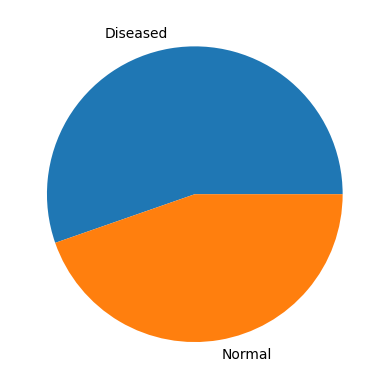

In [16]:
plt.pie(df['HeartDisease'].value_counts(), labels=['Diseased', 'Normal'])
plt.show

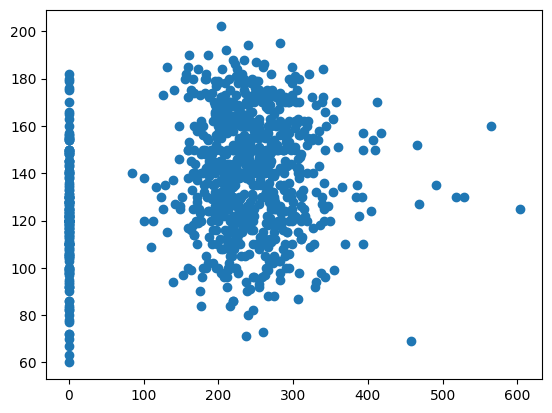

In [17]:
plt.scatter(df['Cholesterol'],df['MaxHR'])

### Correlation Matrix

In [18]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [19]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [20]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

### Encoding values: 
##### OneHot Encoding Sex (Is Male):- M = 1, F = 0

In [21]:
def label_encoder(col):
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    df[col] = df[col].astype('category')
    return df

##### Chest Pain (4 Categories)

In [22]:
label_encoder('Sex')
label_encoder('ChestPainType')
label_encoder('RestingECG')
label_encoder('ST_Slope')
label_encoder('HeartDisease')
label_encoder('ExerciseAngina')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


##### Heart Disease

<Axes: >

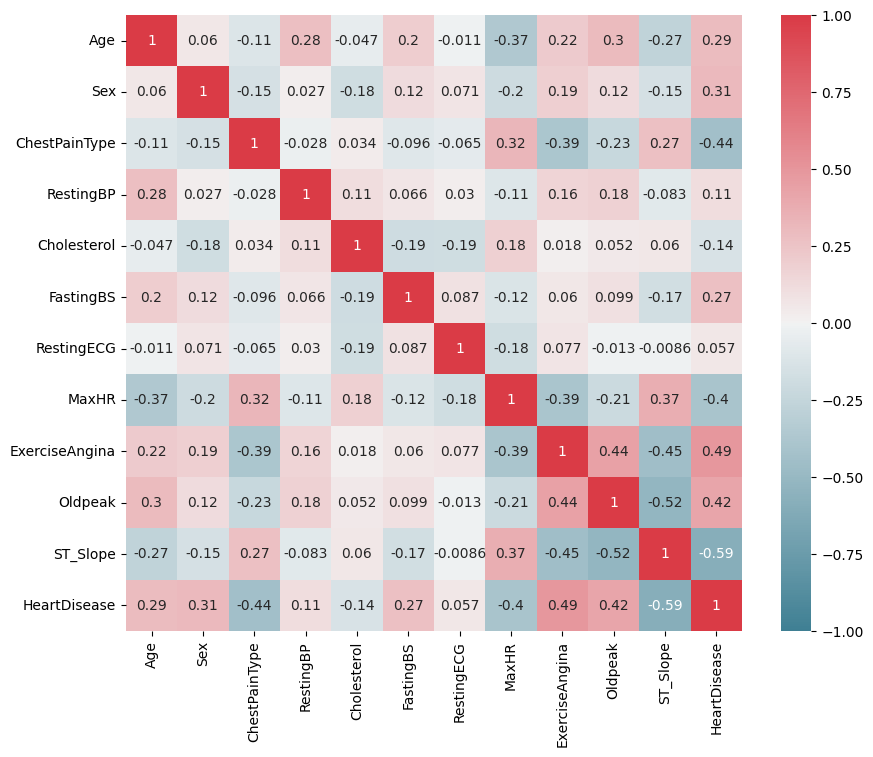

In [23]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method = 'spearman')
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, annot=True)

### Pandas Profiling

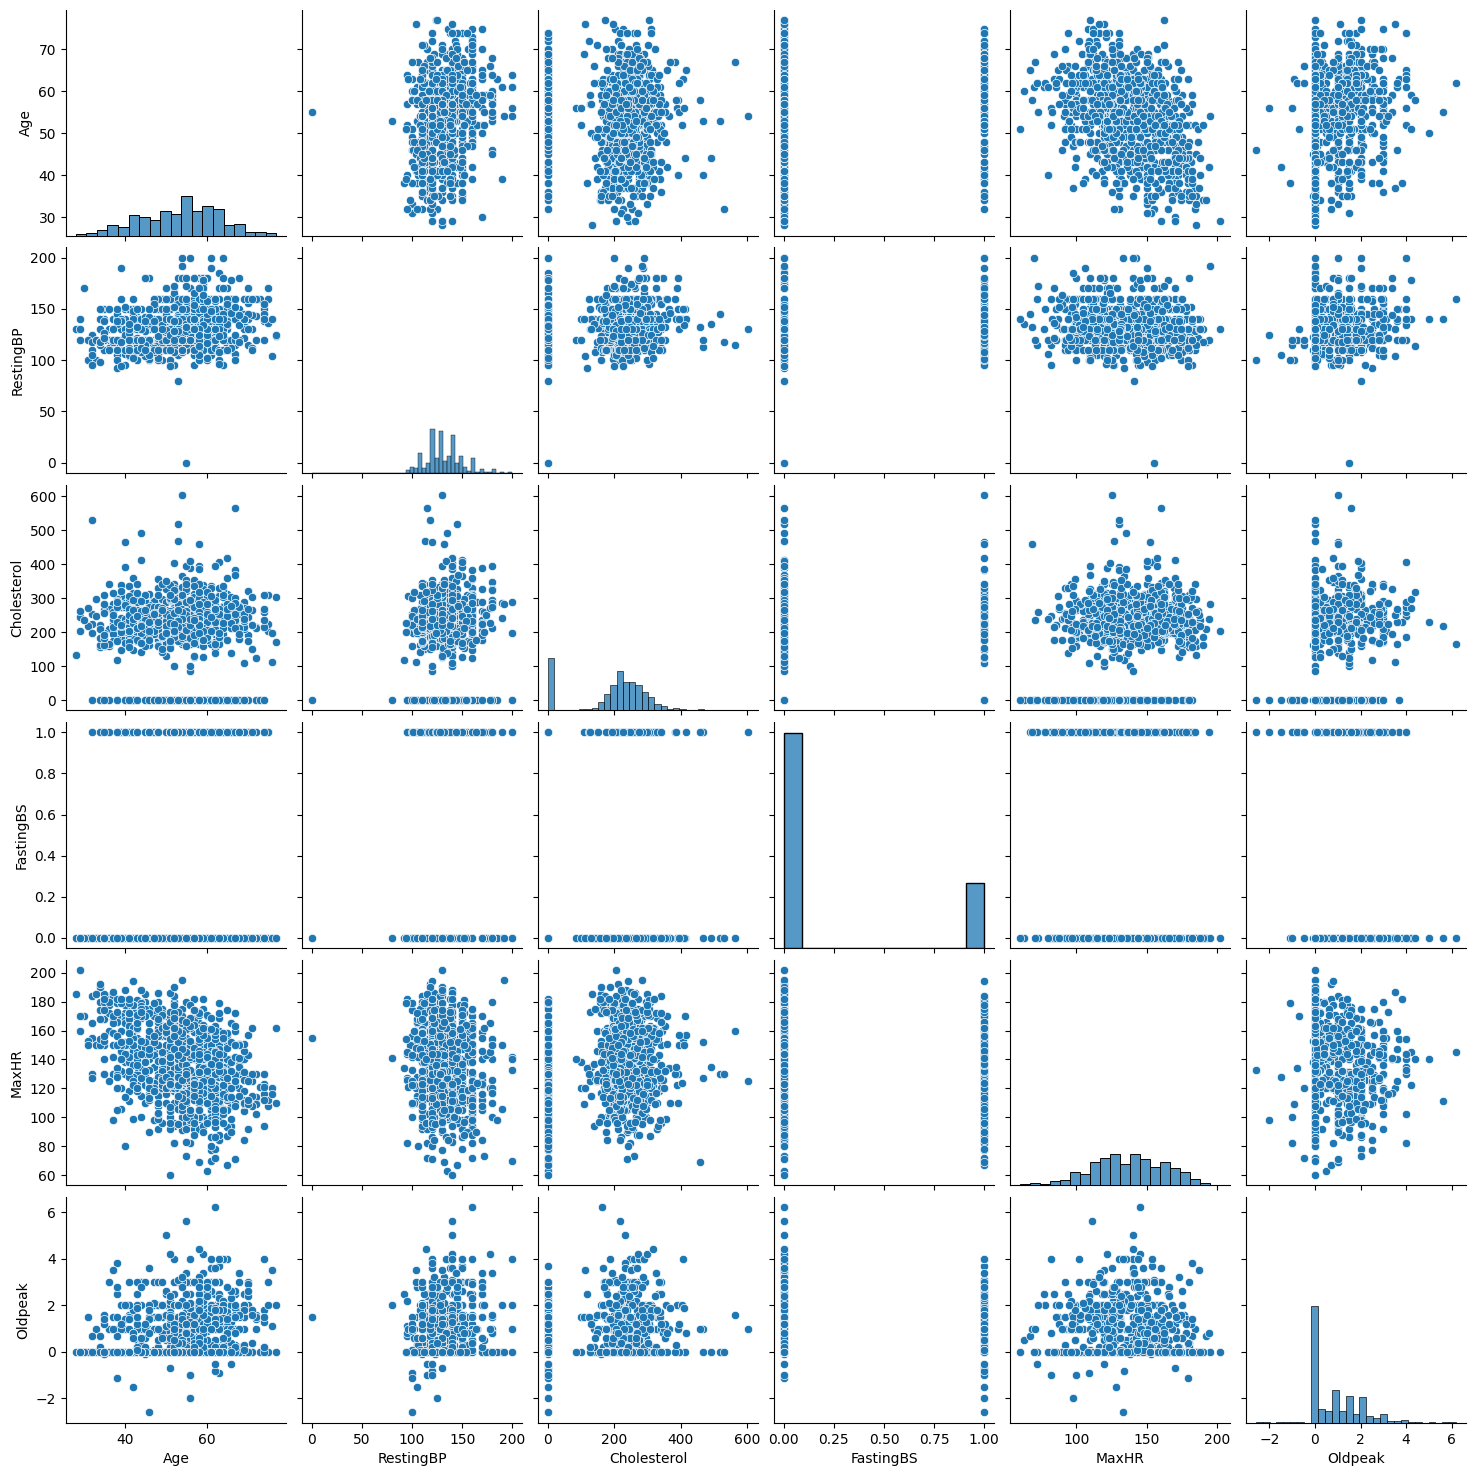

In [27]:
sns.pairplot(df)

##### Let us check of the outcome based on features in linearly classifiable

In [28]:
x = df.drop(columns='HeartDisease')
y = df['HeartDisease']
x,y

(     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
 0     40   1             1        140          289          0          1   
 1     49   0             2        160          180          0          1   
 2     37   1             1        130          283          0          2   
 3     48   0             0        138          214          0          1   
 4     54   1             2        150          195          0          1   
 ..   ...  ..           ...        ...          ...        ...        ...   
 913   45   1             3        110          264          0          1   
 914   68   1             0        144          193          1          1   
 915   57   1             0        130          131          0          1   
 916   57   0             1        130          236          0          0   
 917   38   1             2        138          175          0          1   
 
      MaxHR ExerciseAngina  Oldpeak ST_Slope  
 0      172              0 

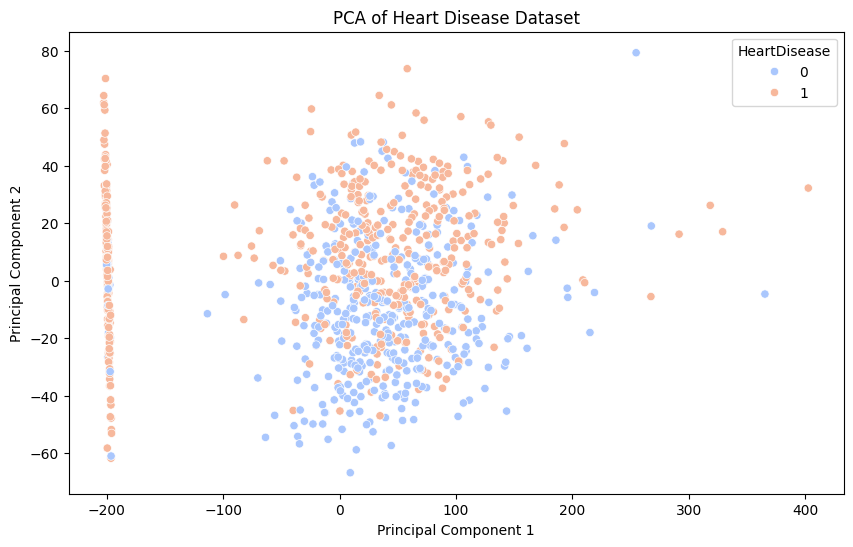

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(x)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y

# Plot the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='HeartDisease', palette='coolwarm')
plt.title('PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [30]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

Explained variance by each component: [0.92021836 0.04913303]


##### We can see from the data that it is not linearly classifiable

##### Export Data

In [31]:
df.to_csv('../data/heart_wrangles')

In [32]:
python --version

NameError: name 'python' is not defined

In [33]:
pip install flake8 pytest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
